In [1]:
from LaneFinding import ImageProcessing, LaneFinding
from PlotHelper import plot_image_grid
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ip = ImageProcessing()

def image_preprocessing_examples(i):
    undist = ip.undistort(i)
    h,l,s = ip.image_to_hls_components(undist)
    return [undist, ip.mask_color(s), ip.mask_sobel(l), 255*ip.mask_color_sobel(undist)]

def plot_side_by_side(i1, t1, i2, t2, outfile):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(i1)
    ax1.set_title(t1, fontsize=30)
    ax2.imshow(i2)
    ax2.set_title(t2, fontsize=30)
    f.subplots_adjust(hspace=0)
    f.savefig(outfile, bbox_inches='tight')

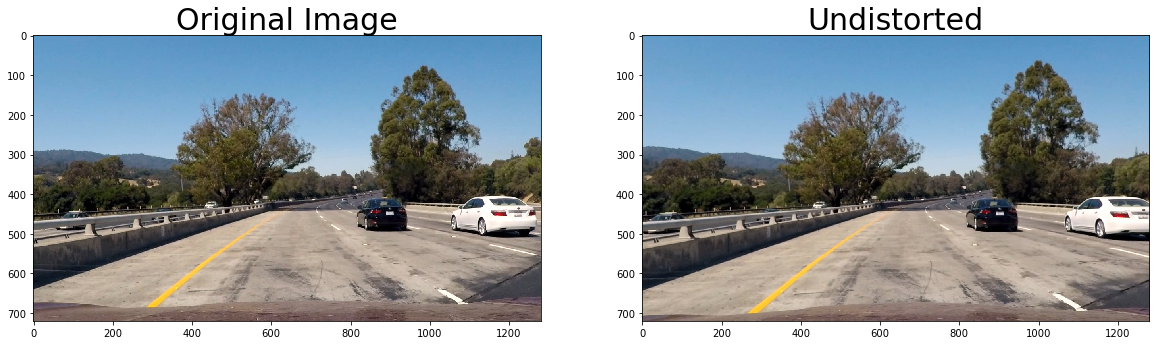

In [3]:
testImg = cv2.cvtColor(cv2.imread("./test_images/test1.jpg"), cv2.COLOR_BGR2RGB)
undist = ip.undistort(testImg)
plot_side_by_side(testImg, 'Original Image', undist, 'Undistorted', "output_images/orig_vs_undistorted.png")

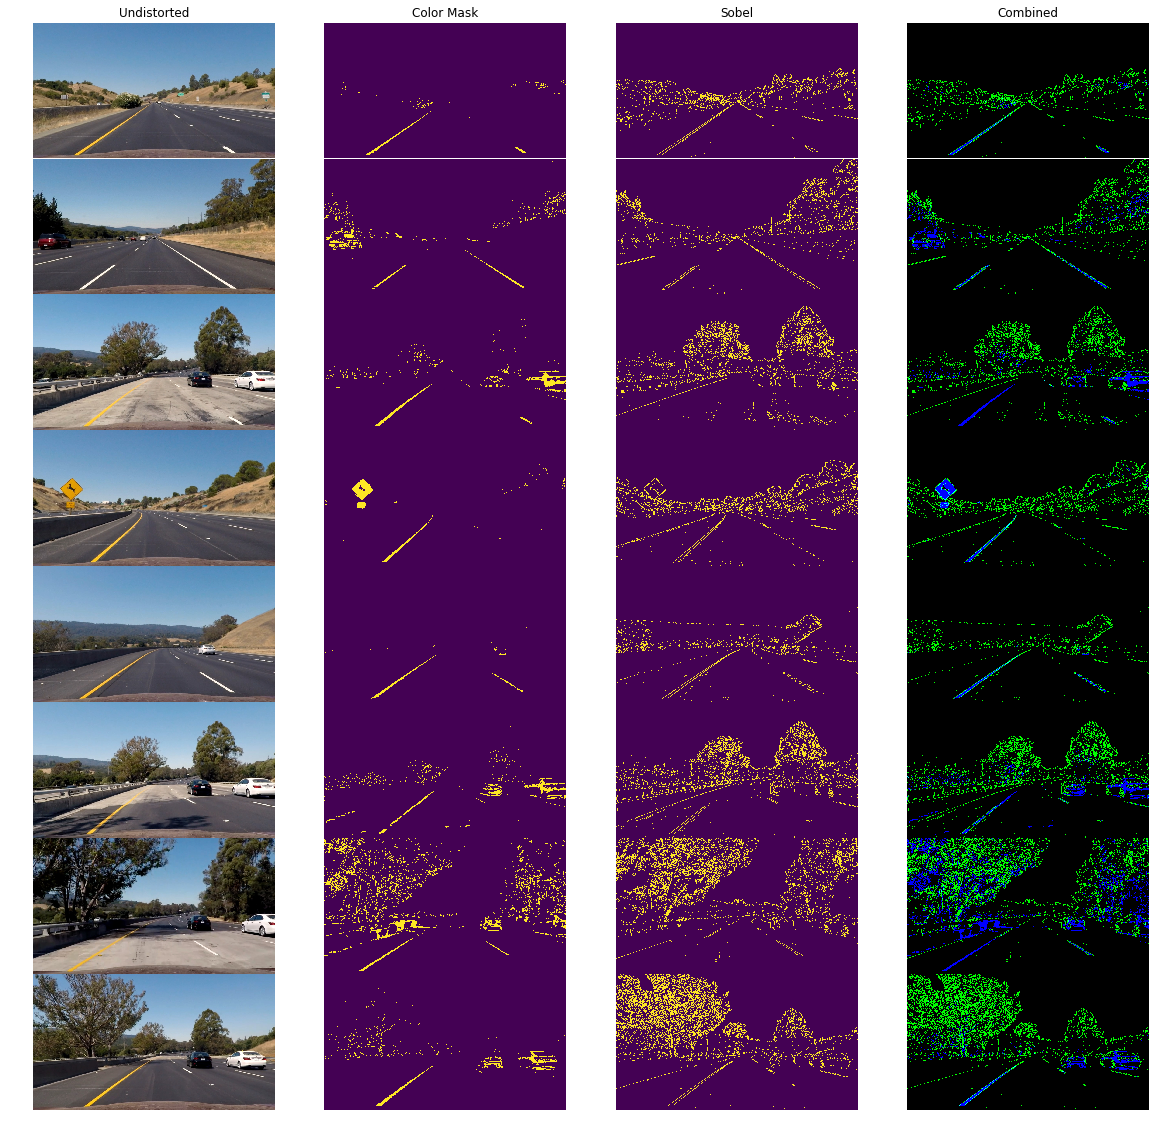

In [4]:
test_image_paths = glob.glob("test_images/*.jpg")
test_images = [cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB) for i in test_image_paths]
test_images1 = map(image_preprocessing_examples, test_images)

fig = plot_image_grid(test_images1, ["Undistorted", "Color Mask", "Sobel", "Combined"], figsize=(20,20))
fig.subplots_adjust(hspace=0)
fig.show()
fig.savefig('output_images/color_masking.png', bbox_inches='tight')

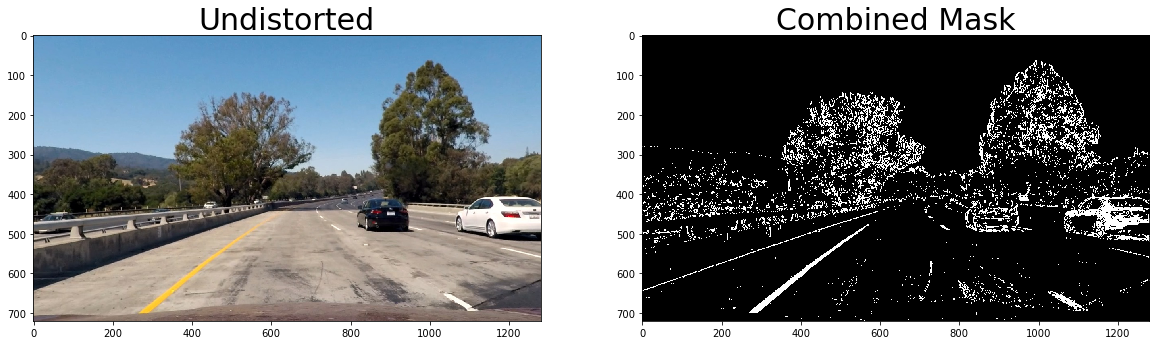

In [5]:
masked = ip.mask_color_sobel(undist)
combined = (255*(masked[:,:, 0] | masked[:,:,1] | masked[:,:,2])).astype(np.uint8)
combined = np.dstack([combined, combined, combined])
plot_side_by_side(undist, 'Undistorted', combined, "Combined Mask", "output_images/undistorted_vs_mask.png")

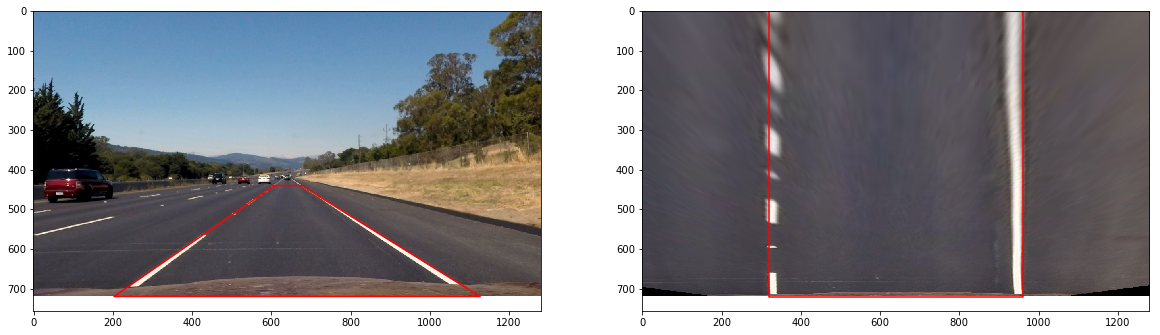

In [6]:
straight = cv2.cvtColor(cv2.imread("./test_images/straight_lines2.jpg"), cv2.COLOR_BGR2RGB)
undist_straight = ip.undistort(straight)
source_points = np.array([(608, 440), (203, 720), (1127, 720), (676, 440), (608, 440)], dtype=np.float32)
warped_points = np.array([(320, 0), (320, 720), (960, 720), (960, 0), (320, 0)], dtype=np.float32)
undist_straight_warped = ip.perspective_transform(undist_straight)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(undist_straight)
ax1.plot(*zip(*source_points), '-', color="r")
#ax1.set_title(t1, fontsize=30)
ax2.imshow(undist_straight_warped)
ax2.plot(*zip(*warped_points), '-', color="r")
#ax2.set_title(t2, fontsize=30)
f.subplots_adjust(hspace=0)
f.savefig("output_images/source_warped_points.png", bbox_inches='tight')

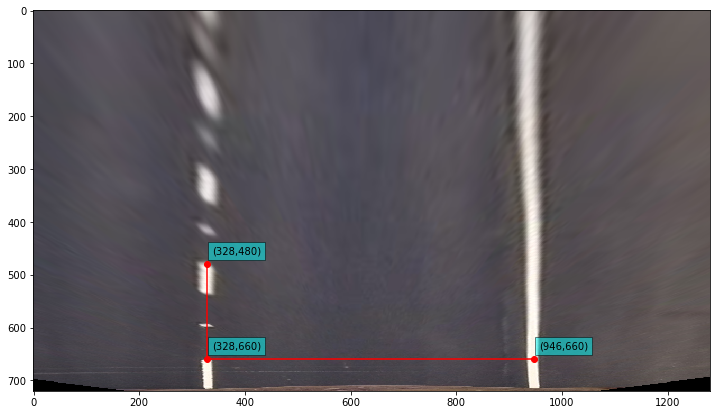

In [7]:
plt.figure(figsize=(25, 7))
plt.imshow(undist_straight_warped)
anchor_points = [(328,480), (328, 660), (946,660)]
anchor_points_label = np.array([(328,480), (328, 660), (946,660)])-(-10,20)

pt2str = lambda p: '({},{})'.format(*p)
plt.plot(*zip(*anchor_points), '-o', color="r")

for i in range(len(anchor_points)):
    plt.annotate(pt2str(anchor_points[i]), anchor_points[i], anchor_points_label[i], 
                 bbox={'facecolor':'cyan', 'alpha':0.5, 'pad':4})
ym_per_pix = (3+12)/(660-480)     
xm_per_pix = 3.7/(946-328)
plt.savefig("output_images/calibration.png", bbox_inches='tight')

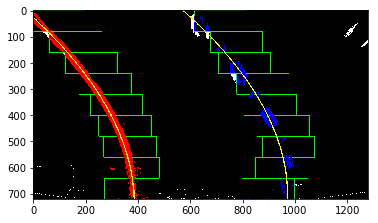

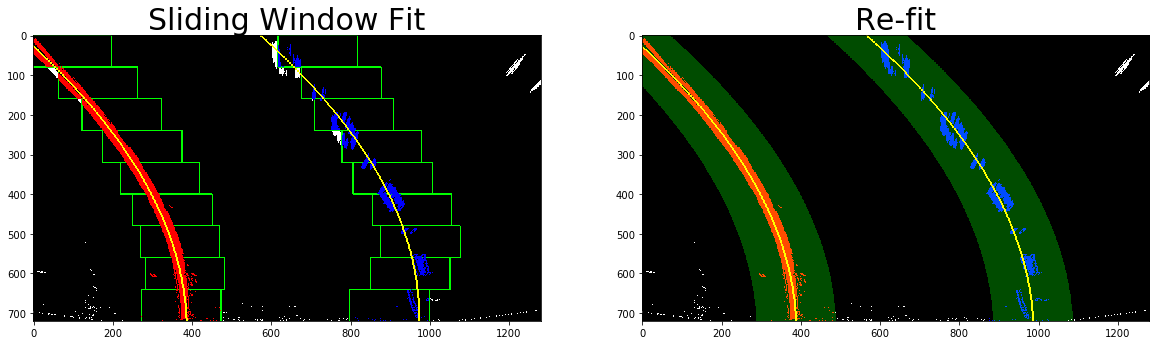

In [8]:
test2 = cv2.cvtColor(cv2.imread("./test_images/test2.jpg"), cv2.COLOR_BGR2RGB)
lf = LaneFinding()
undistorted = lf.imageProcessing.undistort(test2)
birdseye = lf.imageProcessing.perspective_transform(undistorted)
masked = lf.imageProcessing.mask_color_sobel(birdseye)
combined_mask = masked[:,:, 0] | masked[:,:,1] | masked[:,:,2]
fit_vis, left_fit, right_fit = lf.sliding_window_fit(combined_mask)

lf._leftLane.initialize(left_fit)
lf._rightLane.initialize(right_fit)
plt.figure()
plt.imshow(fit_vis)
fit_vis2, left_fit, right_fit = lf.refit(combined_mask)
plot_side_by_side(fit_vis, "Sliding Window Fit", fit_vis2, "Re-fit", "output_images/fitting.png")

In [4]:
def perspective_transform_examples(i):
    undist = ip.undistort(i)
    birdeye = ip.perspective_transform(undist)
    return [undist, birdeye, 255* ip.mask_color_sobel(birdeye)]

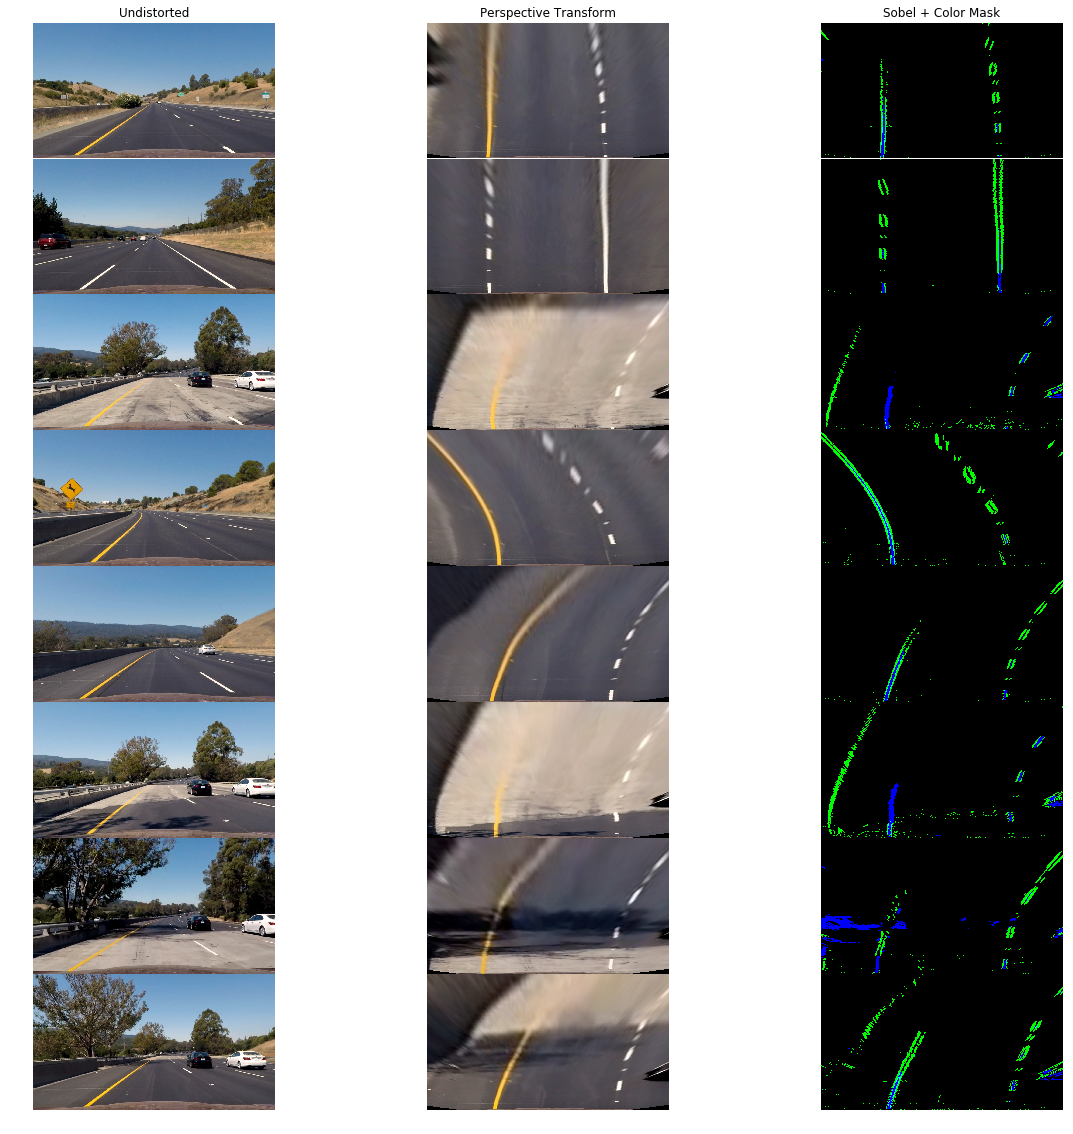

In [5]:
test_images_perspective = map(perspective_transform_examples, test_images)
fig = plot_image_grid(test_images_perspective, ["Undistorted", "Perspective Transform", "Sobel + Color Mask"], figsize=(20,20))
fig.subplots_adjust(hspace=0)
fig.show()